### 고령자 보행자 사고는 교차로 또는 횡단보도 인근에서 더 많이 발생한다.

귀무가설(H0): 고령자 보행자 사고량는 교차로 또는 횡단보도 인근 여부와 관련이 없다.
<br>
<br>
대립가설(H1): 고령자 보행자 사고량은 교차로 또는 횡단보도 인근 여부와 관련이 있다.

In [7]:
# 라이브러리 호출 및 plot 설정
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import warnings

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings("ignore")

In [8]:
df_total = pd.read_csv('../../data/preprocessed_data/시도_시군구별_보행자_사고_사고유형_전처리ver.csv')
# df_total.head()
HTML(df_total.head().to_html())

,연도,시군구,법정동코드,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,도로형태,피해자 상해정도
0,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로부근,중상
1,2020,서울특별시 종로구 창성동,1111010500,중상사고,0,1,0,0,차대사람 - 차도통행중,교차로 - 교차로안,중상
2,2020,서울특별시 종로구 통인동,1111010800,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상
3,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 차도통행중,교차로 - 교차로안,경상
4,2020,서울특별시 종로구 누상동,1111010900,경상사고,0,0,1,0,차대사람 - 기타,단일로 - 기타,경상


In [9]:
# 사고유형별 평균 피해자 수
df_total['총피해자수'] = (
    df_total['사망자수'] +
    df_total['중상자수'] +
    df_total['경상자수'] +
    df_total['부상신고자수']
)

df_total.groupby('사고유형')['총피해자수'].mean().sort_values(ascending=False)

# ======================================
# 피해자 수가 아닌 사고 건수 중심으로 시각화 및 검정
# ======================================

사고유형
차대사람 - 보도통행중         1.058694
차대사람 - 기타            1.050999
차대사람 - 횡단중           1.046304
차대사람 - 길가장자리구역통행중    1.040408
차대사람 - 차도통행중         1.029071
Name: 총피해자수, dtype: float64

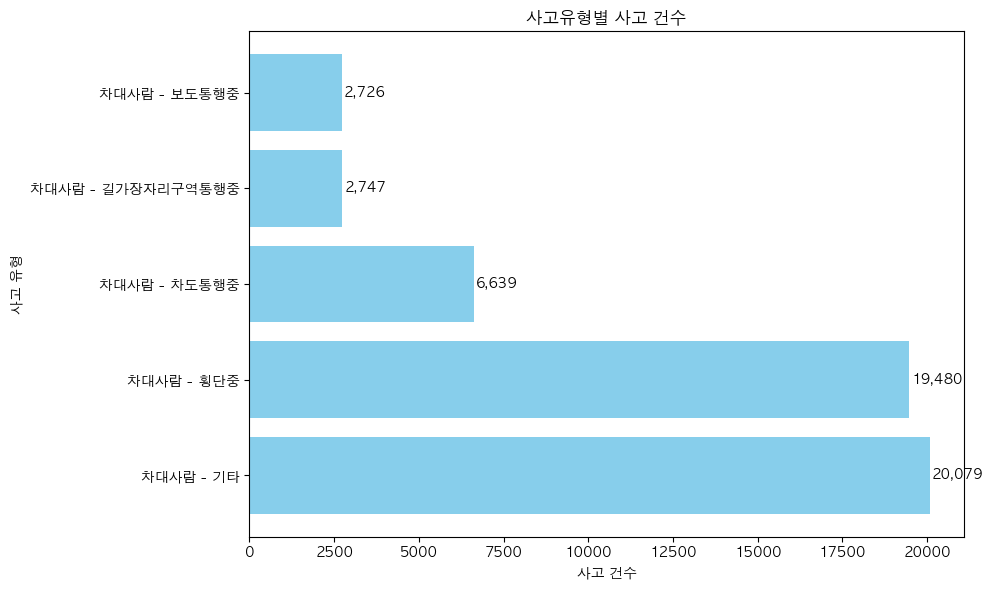

In [10]:
# 사고유형별 건수 계산
accident_types = df_total['사고유형'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(accident_types.index, accident_types.values, color='skyblue')

# 각 막대에 숫자 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

plt.xlabel('사고 건수')
plt.ylabel('사고 유형')
plt.title('사고유형별 사고 건수')
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_5/사고유형별_사고_건수.png'
# plt.savefig(save_path)

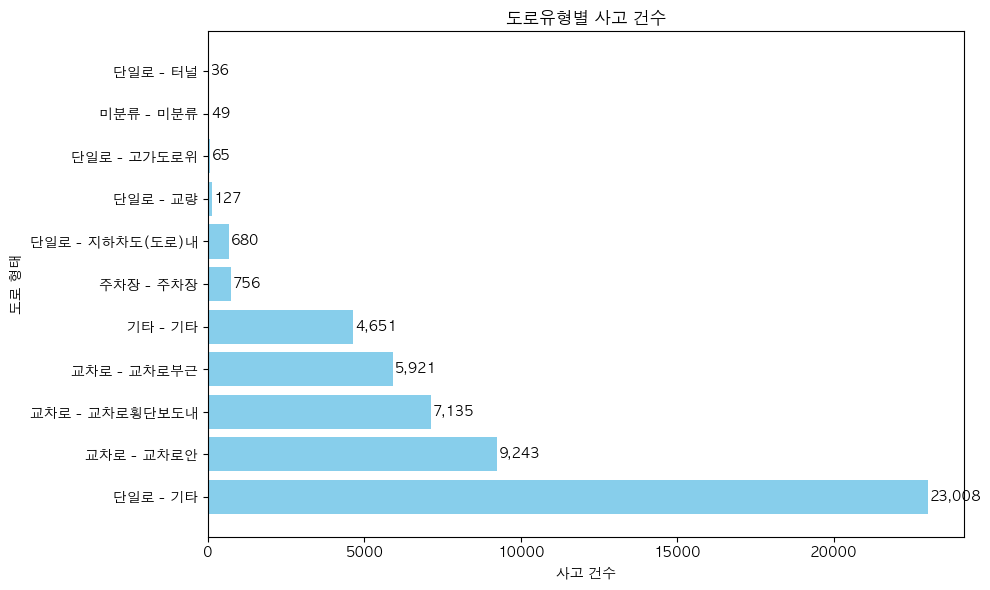

In [11]:
road_type = df_total['도로형태'].value_counts()

# 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(road_type.index, road_type.values, color='skyblue')

# 각 막대에 숫자 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width + 50, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}', va='center', fontsize=10)

plt.xlabel('사고 건수')
plt.ylabel('도로 형태')
plt.title('도로유형별 사고 건수')
plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_5/도로유형별_사고_건수.png'
# plt.savefig(save_path)

In [12]:
# 교차로 또는 횡단보도
crosswalk_roadtypes = [
    '교차로 - 교차로안',
    '교차로 - 교차로부근',
    '교차로 - 교차로횡단보도내'
]

# 사고유형별 전체 사고 건수
total_by_type = df_total['사고유형'].value_counts().rename('전체사고수')

# 교차로 또는 횡단보도 도로형태에서 발생한 사고만 필터링
df_crosswalk = df_total[df_total['도로형태'].isin(crosswalk_roadtypes)]

# 사고유형별 교차로/횡단보도 내 사고 건수
crosswalk_by_type = df_crosswalk['사고유형'].value_counts().rename('교차로_또는_횡단보도_사고수')

# 합치기
summary = pd.concat([total_by_type, crosswalk_by_type], axis=1).fillna(0)
summary['비율(%)'] = ((summary['교차로_또는_횡단보도_사고수'] / summary['전체사고수']) * 100).round(2)

# 정렬 (선택)
summary = summary.sort_values(by='비율(%)', ascending=False)
summary

,전체사고수,교차로_또는_횡단보도_사고수,비율(%)
사고유형,,,
차대사람 - 횡단중,19480,12235,62.81
차대사람 - 차도통행중,6639,2604,39.22
차대사람 - 보도통행중,2726,900,33.02
차대사람 - 기타,20079,5835,29.06
차대사람 - 길가장자리구역통행중,2747,725,26.39


In [ ]:
# 도로형태 x 사고유형 교차표 생성
pivot = df_total.pivot_table(index='도로형태', columns='사고유형', aggfunc='size', fill_value=0)
pivot

사고유형,차대사람 - 기타,차대사람 - 길가장자리구역통행중,차대사람 - 보도통행중,차대사람 - 차도통행중,차대사람 - 횡단중
도로형태,,,,,
교차로 - 교차로부근,2118,366,239,915,2283
교차로 - 교차로안,2866,345,237,1606,4189
교차로 - 교차로횡단보도내,851,14,424,83,5763
기타 - 기타,2900,142,607,320,682
단일로 - 고가도로위,17,6,2,18,22
단일로 - 교량,51,12,10,19,35
단일로 - 기타,10485,1737,1127,3422,6237
단일로 - 지하차도(도로)내,156,93,52,170,209
단일로 - 터널,16,4,3,6,7


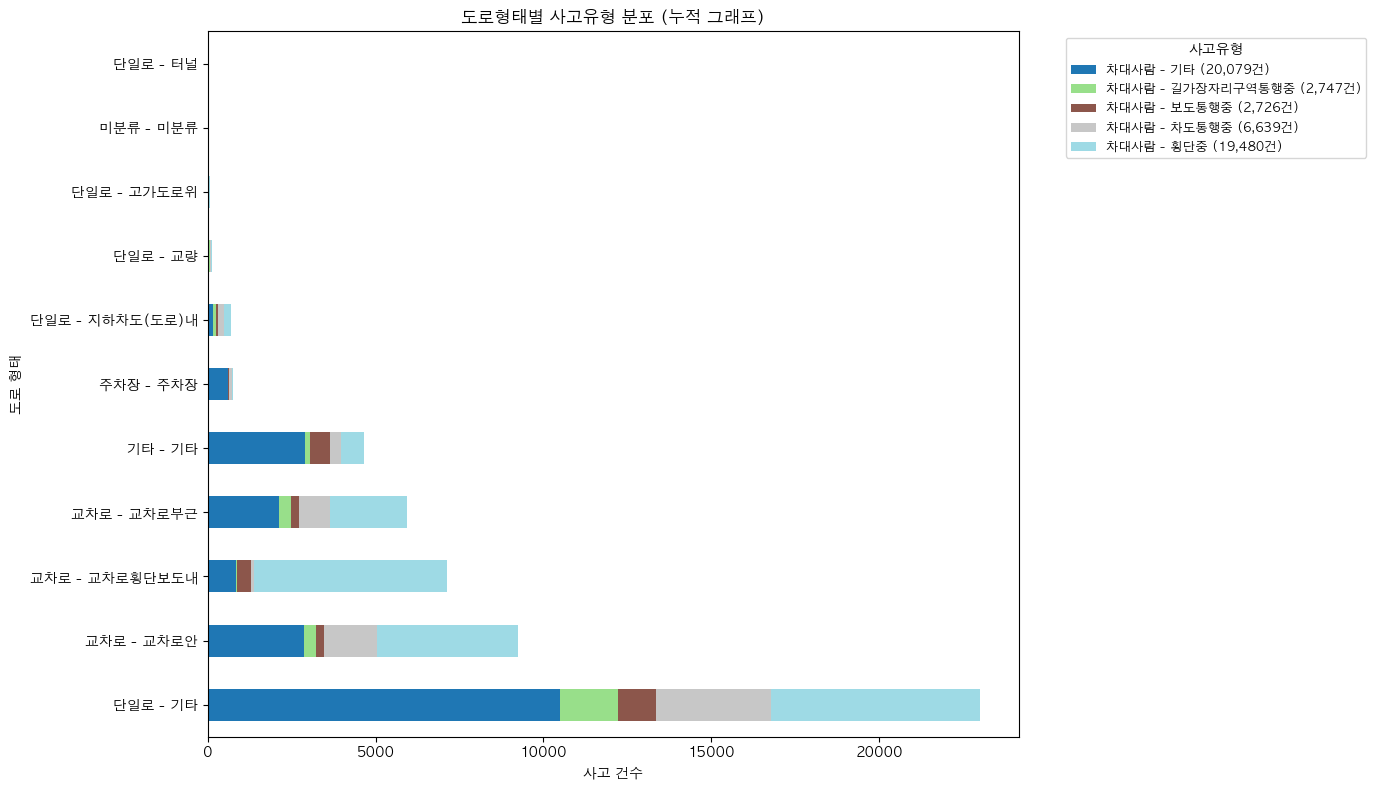

<Figure size 640x480 with 0 Axes>

In [ ]:
# 시각화: 세로 누적 막대그래프
pivot_sorted = pivot.loc[pivot.sum(axis=1).sort_values(ascending=False).index]  # 전체 사고수 기준 정렬

labels_with_counts = [f"{col} ({pivot[col].sum():,}건)" for col in pivot.columns]

# 누적 막대 그래프 그리기
ax = pivot_sorted.plot(kind='barh', stacked=True, figsize=(14, 8), colormap='tab20')
plt.xlabel('사고 건수')
plt.ylabel('도로 형태')
plt.title('도로형태별 사고유형 분포 (누적 그래프)')

# 범례에 숫자 포함하여 수동 지정
ax.legend(
    labels=labels_with_counts,
    title='사고유형',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

# save_path = '../../outputs/가설_5/도로형태별_사고_유형_분포.png'
# plt.savefig(save_path)

In [76]:
# 교차로/횡단보도 인근 여부 태그 추가
def classify_location(row):
    if row in ['교차로 - 교차로안', '교차로 - 교차로부근', '교차로 - 교차로횡단보도내']:
        return '교차로/횡단보도'
    else:
        return '기타도로'

df_classified = df_total.copy()
df_classified['위치구분'] = df_classified['도로형태'].apply(classify_location)

contingency_table = pd.crosstab(df_classified['위치구분'], df_classified['사고유형'])
contingency_table

사고유형,차대사람 - 기타,차대사람 - 길가장자리구역통행중,차대사람 - 보도통행중,차대사람 - 차도통행중,차대사람 - 횡단중
위치구분,,,,,
교차로/횡단보도,5835,725,900,2604,12235
기타도로,14244,2022,1826,4035,7245


In [ ]:
# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"카이제곱 값: {chi2:.2f}")
print(f"p-value: {p:.15f}")

# ====================================
# p-value는 0.0000이므로, 회귀계수가 유의미
# 귀무가설 기각
# ====================================

카이제곱 값: 5163.84
p-value: 0.000000000000000


In [82]:
df_classified['위치_이진'] = df_classified['위치구분'].map({'기타도로': 0, '교차로/횡단보도': 1})   # 위치 이진 변수 생성
df_dummy = pd.get_dummies(df_classified[['위치_이진', '사고유형']], drop_first=True)          # 사고유형을 더미 변수로 변환
df_dummy.columns = df_dummy.columns.str.replace(' ', '_').str.replace('-', '_').str.replace('(', '').str.replace(')', '')   # 컬럼명 정리

# X, y 설정
X = df_dummy.drop(columns='위치_이진').astype(float)
y = df_dummy['위치_이진'].astype(float)

X = sm.add_constant(X)      # 상수항 추가
model = sm.OLS(y, X).fit()  # 학습

model.summary()             # 결과

# ===============================================================================================================
# Intercept (기준: 차대사람 - 기타):       0.2906         >>>       ‘기타’ 사고유형은 교차로/횡단보도에서 발생할 확률이 약 29.1%
# 차대사람 - 길가장자리구역통행중:           -0.0267         >>>        기준보다 2.7%p 낮음, 더 기타도로에서 발생함
# 차대사람 - 보도통행중:                   0.0396         >>>        기준보다 4.0%p 높음, 교차로/횡단보도에서 더 자주 발생
# 차대사람 - 차도통행중:                   0.1016         >>>        기준보다 10.2%p 높음, 교차로/횡단보도 사고 비중 큼
# 차대사람 - 횡단중:                      0.3375         >>>        기준보다 33.8%p 더 높음, 명확히 교차로 관련


# 모든 변수의 p-value < 0.01이므로 모든 변수가 통계적 유의미

# R-squared = 0.100  >  사고유형만으로는 전체 위치 분포의 10% 정도 설명 가능
# 즉, 해당 사고가 교차로/횡단보도에서 발생했는지 아닌지를 정확히 예측하기엔 부족

# 귀무가설 기각
# ===============================================================================================================

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  위치_이진   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     1434.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:44:04   Log-Likelihood:                -34293.
No. Observations:               51671   AIC:                         6.860e+04
Df Residuals:                   51666   BIC:                         6.864e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2906      0.003     87.629      0.000       0.284       0.297
사고유형_차대사람___길가장자리구역통행중    -0.0267      0.010     -2.791      0.005      -0.045      -0.008
사고유형_차대사람___보도통행중          0.0396      0.010      4.124      0.000       0.021       0.058
사고유형_차대사람___차도통행중          0.1016      0.007     15.276      0.000       0.089       0.115
사고유형_차대사람___횡단중            0.3375      0.005     71.412      0.000       0.328       0.347
==============================================================================
Omnibus:                   325371.444   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5304.663
Skew:                           0.255   Prob(JB):                         0.00
Kurtosis:                       1.515   Cond. No.                         5.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""